# Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [2]:
# Load the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSu_3xbzvwqg6MpBKKDB3u8YHK31h6CTK5z1MClZorpRvHz4gTYJdv3IrrdSzwBA3gHuxlY7hsShEpZ/pub?output=csv'
df = pd.read_csv(url)
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


# Explore the data

In [3]:
# Explore the data
print('There are ', df.shape[0], 'data points, and', (df.shape[1] - 1), 'features.')
print('There are', df.duplicated().sum(), 'duplicates in the data set.')
print('There are', df.isna().sum().sum(), 'missing values in the data set.')

df.isna().sum()

There are  61069 data points, and 20 features.
There are 146 duplicates in the data set.
There are 307463 missing values in the data set.


class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

# Clean the data

## Duplicates

In [4]:
# Look for duplicates
print('Duplicates:', df.duplicated().sum())

# Remove the duplicates
df.drop_duplicates(inplace = True)

# Make sure the duplicate values were dropped
print('Duplicates:', df.duplicated().sum())

Duplicates: 146
Duplicates: 0


## Missing values

In [5]:
# Check for missing values
print('Missing Values:', df.isna().sum().sum())

# Find missing values by column
print(df.isna().sum())
print('-' * 80)

# Get the percentage of missing data in each row
for col, n in zip(df.isna().sum().index, df.isna().sum().values):
  if n > 0:
    print(f'Percentage of data missing in {col}: {round(n / len(df) * 100, 2)}')

Missing Values: 307019
class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9855
gill-spacing            25062
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51536
stem-surface            38122
stem-color                  0
veil-type               57746
veil-color              53510
has-ring                    0
ring-type                2471
spore-print-color       54597
habitat                     0
season                      0
dtype: int64
--------------------------------------------------------------------------------
Percentage of data missing in cap-surface: 23.18
Percentage of data missing in gill-attachment: 16.18
Percentage of data missing in gill-spacing: 41.14
Percentage of data missing in stem-root: 84.59
Percentage of data missing in stem-surface: 62.57
Perc

In [6]:
# Drop the columns with more than 60% of the data missing.
df.dropna(axis = 1, thresh = int(0.4*len(df)), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60923 entries, 0 to 61068
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 60923 non-null  object 
 1   cap-diameter          60923 non-null  float64
 2   cap-shape             60923 non-null  object 
 3   cap-surface           46803 non-null  object 
 4   cap-color             60923 non-null  object 
 5   does-bruise-or-bleed  60923 non-null  object 
 6   gill-attachment       51068 non-null  object 
 7   gill-spacing          35861 non-null  object 
 8   gill-color            60923 non-null  object 
 9   stem-height           60923 non-null  float64
 10  stem-width            60923 non-null  float64
 11  stem-color            60923 non-null  object 
 12  has-ring              60923 non-null  object 
 13  ring-type             58452 non-null  object 
 14  habitat               60923 non-null  object 
 15  season             

In [7]:
# Before we impute, we will make a separate copy of the
# DataFrame for machine learning.
ml_df = df.copy()

# The remaning missing values will be imputed with 'M'. A separate copy
# of the data will be used for machine learning so the we don't risk data leakage.
df.fillna('M', inplace = True)

# Check to make sure missing values have been filled.
print('Missing Values:', df.isna().sum().sum())

Missing Values: 0


> We chose to impute missing values with 'M' in the case where less than 80%, and more than 20% of the data was missing. We felt more than 80% of the values of an attribute being missing would not contribute much to our model. In the case of 20-80% of the data missing we feel that a label that indicates the data is missing may be beneficial to our model. We will revisit these assumptions in the event that we are not able to construct a model that scores well on this data.

## Inconsistent labels

In [8]:
# Check for inconsistent labels
cat_cols = df.select_dtypes(include = 'object')
for col in cat_cols:
  print('Column:', col)
  print(df[col].value_counts(normalize = True))
  print()

Column: class
p    0.553847
e    0.446153
Name: class, dtype: float64

Column: cap-shape
x    0.442066
f    0.220015
s    0.117591
b    0.093462
o    0.054429
p    0.042644
c    0.029792
Name: cap-shape, dtype: float64

Column: cap-surface
M    0.231768
t    0.134334
s    0.124419
y    0.104082
h    0.081644
g    0.077508
d    0.072748
e    0.042414
k    0.037802
i    0.036522
w    0.035290
l    0.021470
Name: cap-surface, dtype: float64

Column: cap-color
n    0.397305
y    0.140193
w    0.125552
g    0.070778
e    0.066231
o    0.059961
r    0.029201
u    0.028052
p    0.027953
k    0.020994
b    0.020189
l    0.013591
Name: cap-color, dtype: float64

Column: does-bruise-or-bleed
f    0.826174
t    0.173826
Name: does-bruise-or-bleed, dtype: float64

Column: gill-attachment
a    0.208411
d    0.168196
M    0.161762
x    0.121678
p    0.098501
e    0.092707
s    0.092707
f    0.056038
Name: gill-attachment, dtype: float64

Column: gill-spacing
M    0.411372
c    0.405134
d    0.127456

> There do not appear to be any inconsistencies in our labels.

## Outliers

In [9]:
# Get the descriptive stats of the numeric data
df.describe()

,cap-diameter,stem-height,stem-width
count,60923.000000,60923.000000,60923.000000
mean,6.741957,6.597202,12.178484
std,5.268435,3.358757,10.030361
min,0.380000,0.000000,0.000000
25%,3.490000,4.650000,5.250000
50%,5.880000,5.960000,10.220000
75%,8.550000,7.750000,16.580000
max,62.340000,33.920000,103.910000


> There are values in 'stem-height' and 'stem-width' that are set to 0. We will investigate these data points more closely.

In [10]:
# Find the rows with 'stem-heigh' equal to 0.
display(df[df['stem-height'] == 0])

# Find the number of entries in 'stem-height' and
# 'stem-width' equal to 0
print(len(df[df['stem-height'] == 0]))
print(len(df[df['stem-width'] == 0]))

# Find the number of rows where exactly one of 'stem-heigh'
# and 'stem-width' is equal to 0
print(len(df[(df['stem-height'] == 0) & (df['stem-width'] != 0)]))
print(len(df[(df['stem-height'] != 0) & (df['stem-width'] == 0)]))

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
56480,p,2.48,o,t,n,f,M,c,w,0.0,0.0,f,f,f,d,u
56481,p,4.29,o,t,w,f,M,c,w,0.0,0.0,f,f,f,d,u
56482,p,4.29,o,t,n,f,M,c,w,0.0,0.0,f,f,f,d,u
56483,p,4.72,o,t,w,f,M,c,w,0.0,0.0,f,f,f,d,u
56484,p,4.66,o,t,w,f,M,c,w,0.0,0.0,f,f,f,d,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58234,p,2.21,o,l,g,f,f,f,f,0.0,0.0,f,f,f,d,w
58235,p,3.34,o,l,g,f,f,f,f,0.0,0.0,f,f,f,d,w
58238,p,2.28,o,l,g,f,f,f,f,0.0,0.0,f,f,f,d,a
58240,p,2.54,o,l,g,f,f,f,f,0.0,0.0,f,f,f,d,u


915
915
0
0


> Based on the above we assume that a 0 for stem-height and stem-width just means the mushroom under consideration doesn't have a stem.

In [11]:
# Check the relatively large values
df.loc[df['stem-width'] > 60, ['cap-diameter', 'stem-height', 'stem-width']]

,cap-diameter,stem-height,stem-width
48361,13.80,17.93,70.21
48362,17.63,17.55,69.37
48363,22.40,15.59,69.47
48364,24.73,16.28,65.87
48365,22.83,16.90,70.92
...,...,...,...
55400,4.90,6.56,62.04
55404,5.78,7.42,73.28
55407,4.39,7.43,67.74
55412,5.32,8.56,61.74


> We would need to consult subject-matter expert to determine if any of these data points are unlikely. So we choose to not alter the numeric data.

# Data visualizations

## Histograms

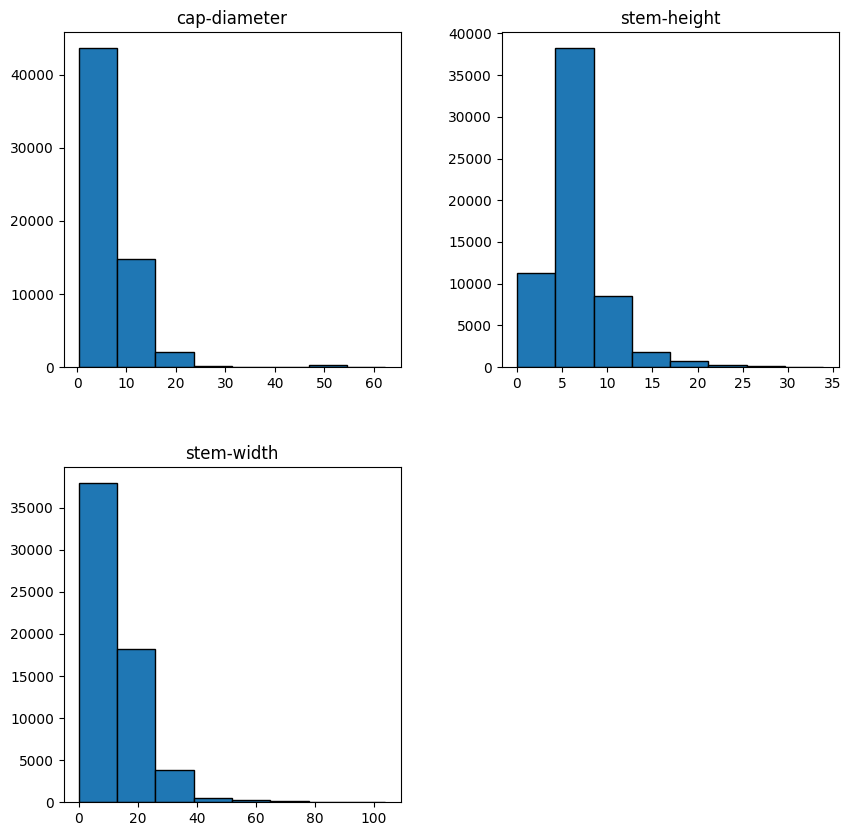

In [12]:
# Make histograms for the numeric features
df.hist(grid = False,
        edgecolor = 'k',
        figsize = (10, 10),
        bins = 8);

## Bar graphs

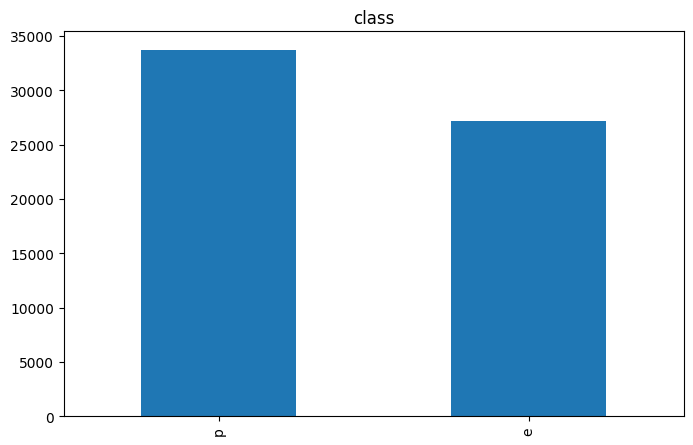

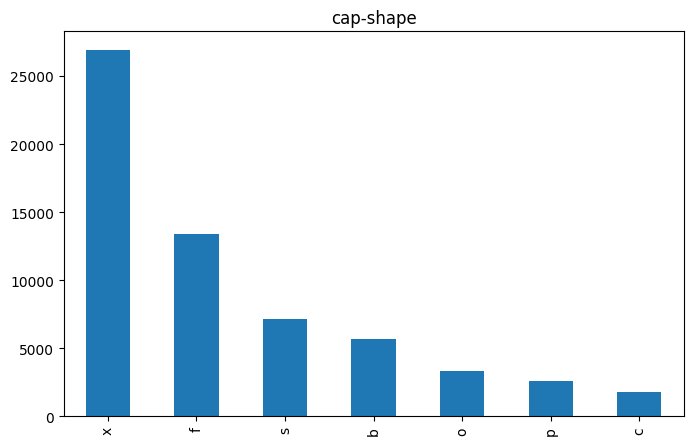

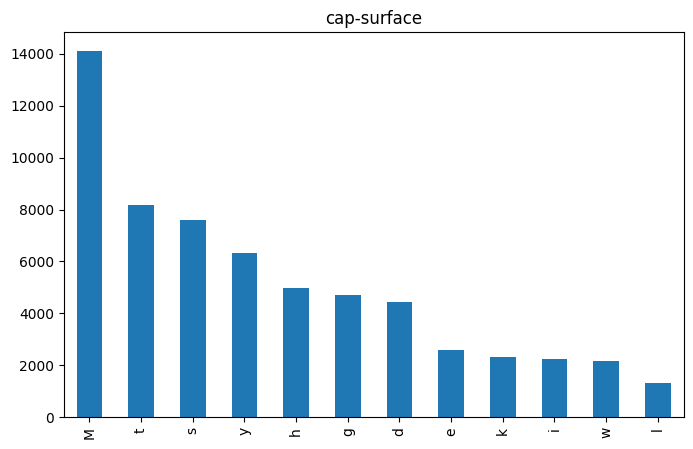

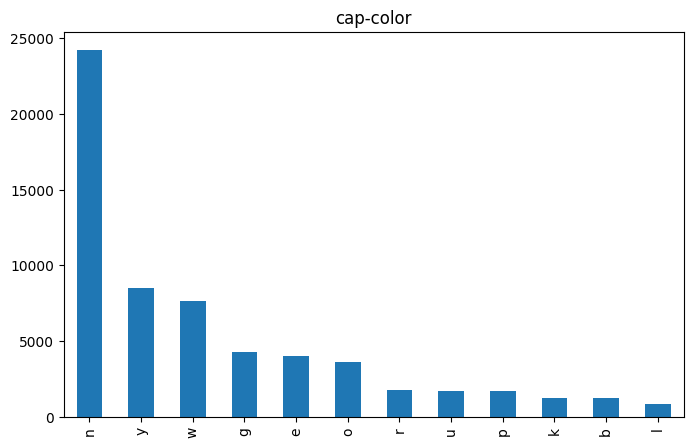

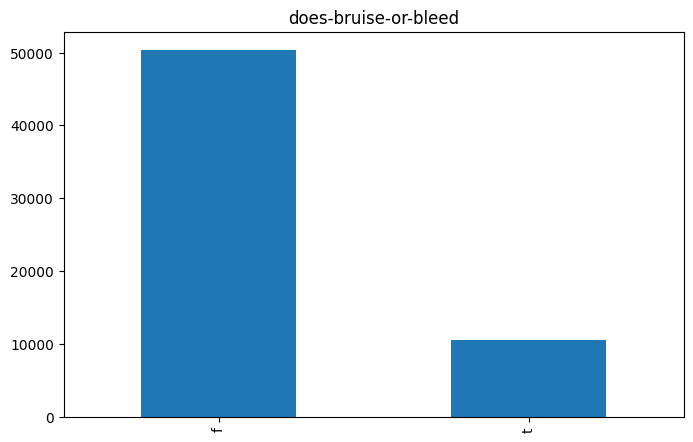

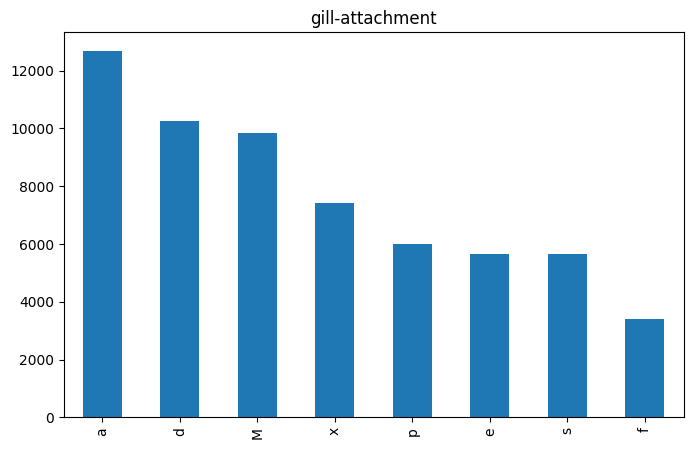

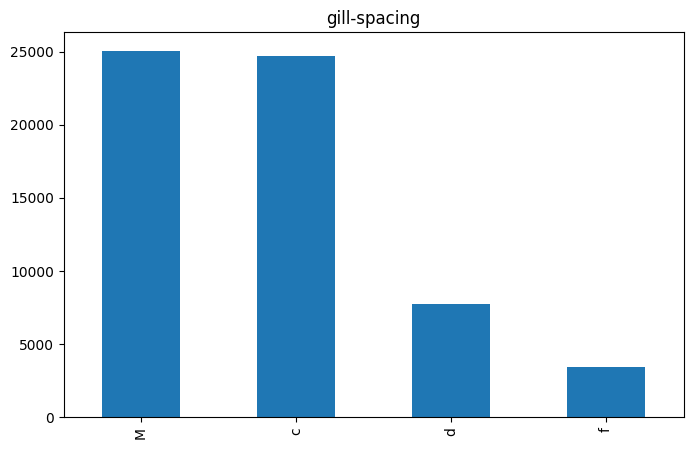

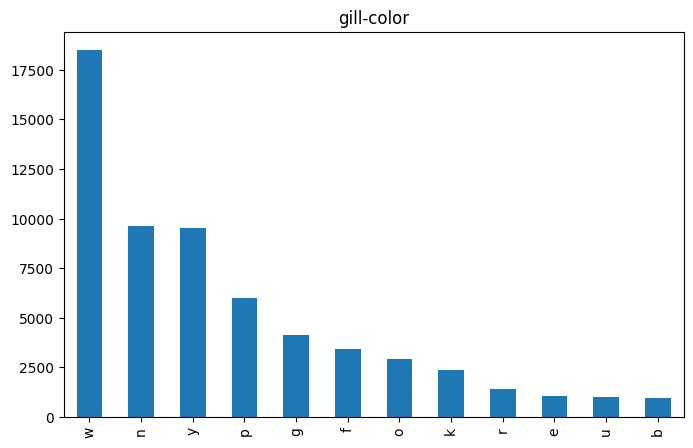

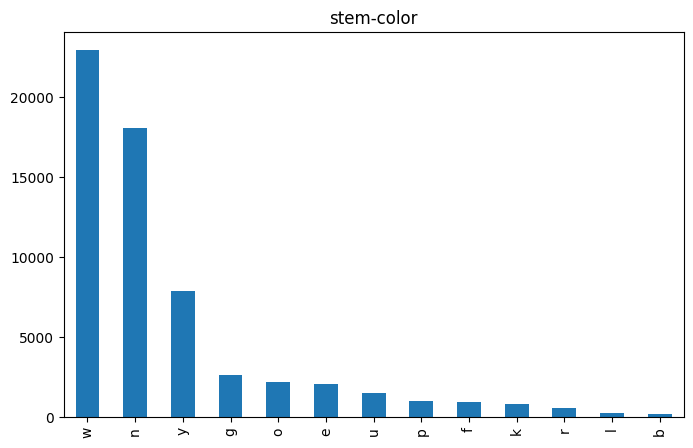

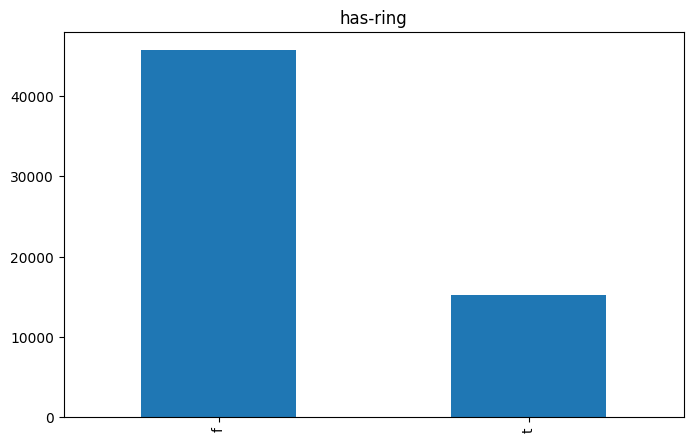

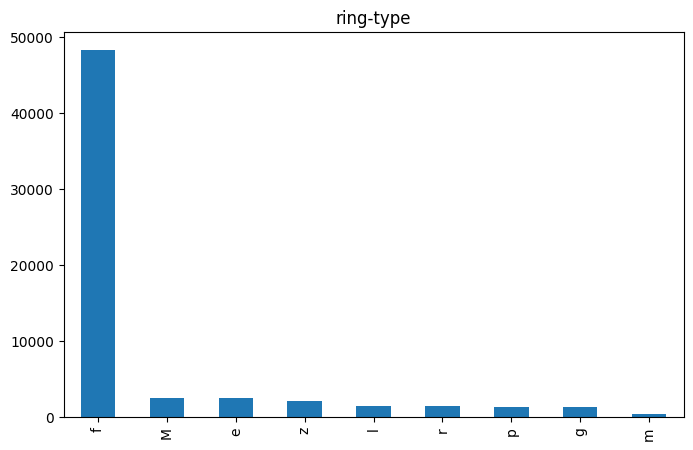

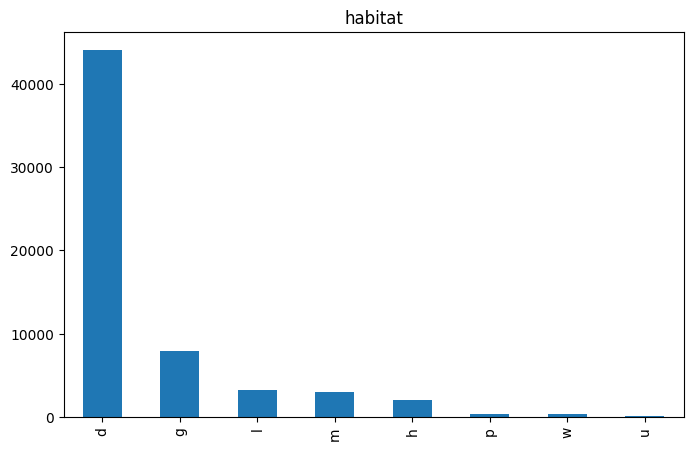

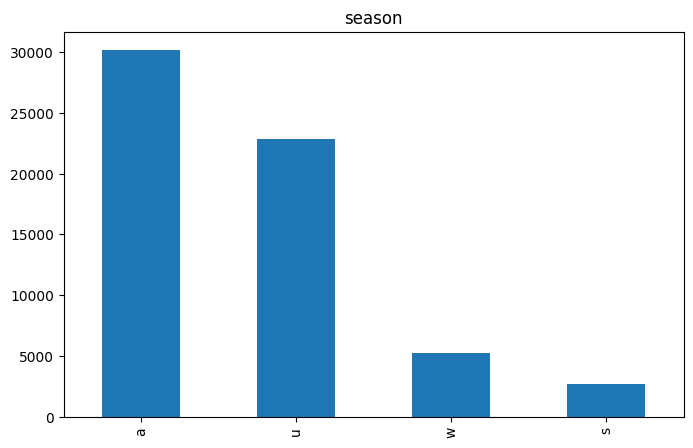

In [13]:
# Plot the categorical data using bar graphs.
for col in df.select_dtypes(include = 'object'):
  plt.figure(figsize = (8, 5));
  df[col].value_counts().plot.bar(title = col);
  plt.show();
  print()

## Multivariate visualizations

### Heatmap

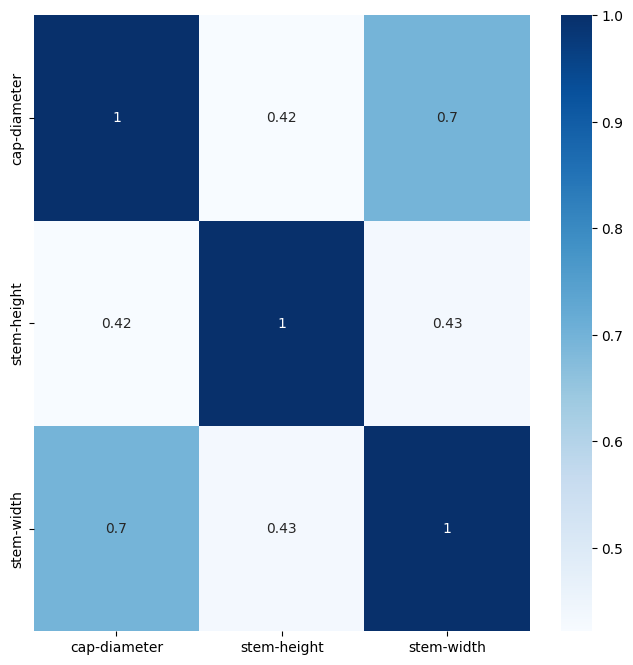

In [15]:
# Check for correlations in the numeric features
corr = df.corr()
plt.figure(figsize = (8, 8));
sns.heatmap(corr, cmap = 'Blues', annot = True);

> There is a moderate correlation between cap-diameter and stem-width.

### Scatterplots

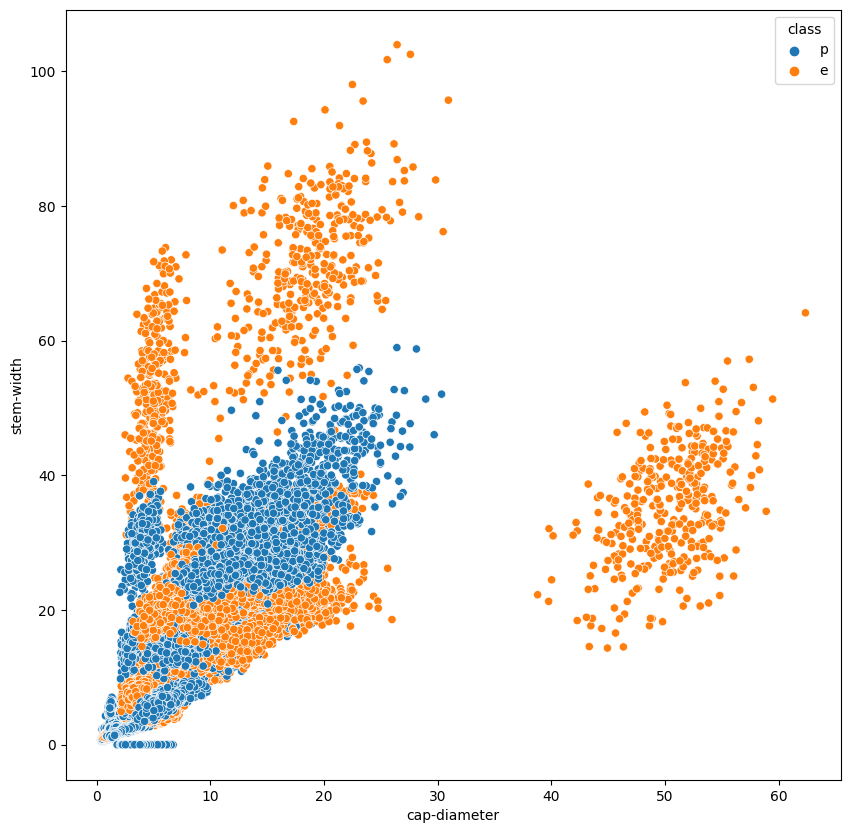

In [16]:
# Construct a scatter plot of stem-width vs. cap-diameter. The 
# hue is class.
plt.figure(figsize = (10, 10))
sns.scatterplot(x = df['cap-diameter'], 
            y = df['stem-width'],
            hue = df['class']);

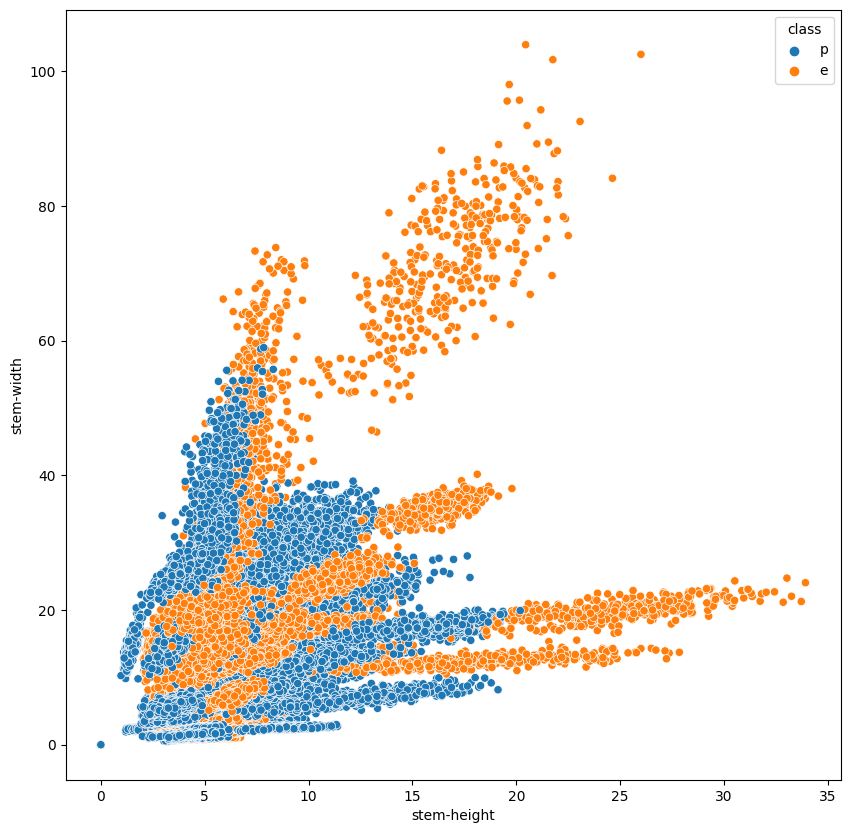

In [18]:
# Construct a scatter plot of stem-height vs. cap-diameter. The 
# hue is class.
plt.figure(figsize = (10, 10))
sns.scatterplot(x = df['stem-height'], 
            y = df['stem-width'],
            hue = df['class']);

> These scatterplots suggest that larger mushrooms are edible. (Please don't test this hypothesis!) If we find that our model is performing poorly, we may consider removing mushrooms with larger stem-heights, stem-widths, and cap-diameters.

### Bar graphs

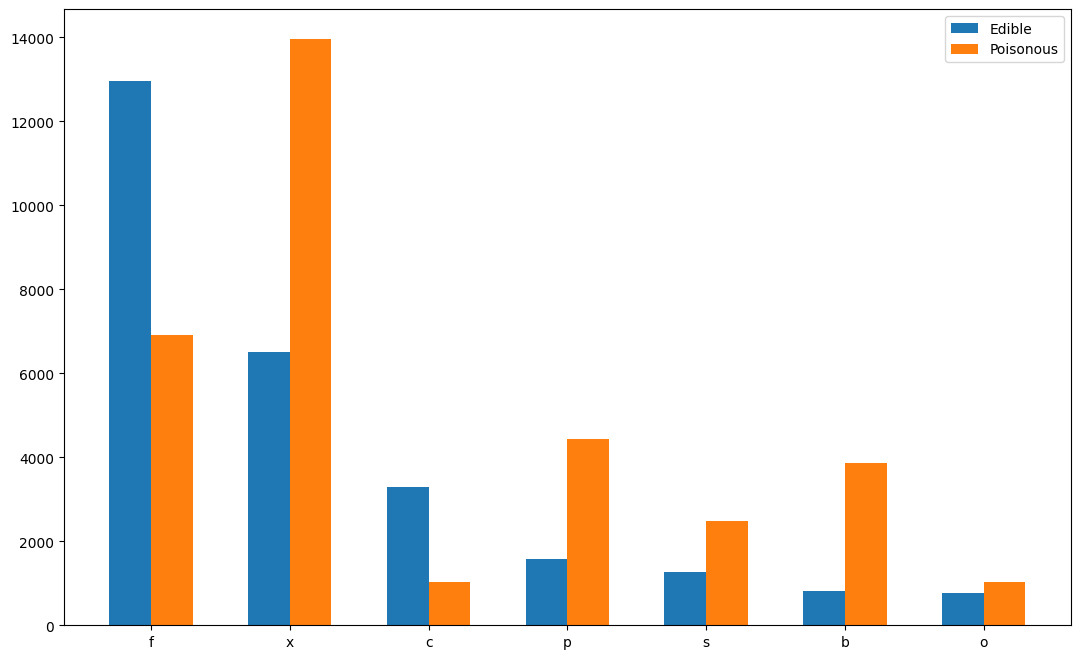

In [19]:
# Plot a bar graph for counts of each cap-shape by class.
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (13, 8))
ax.bar(x = df.loc[df['class'] == 'e', 'cap-shape'].unique(), 
       height = df.loc[df['class'] == 'e', 'cap-shape'].value_counts(),
       width = -0.3, align = 'edge',
       label = 'Edible')
ax.bar(x = df.loc[df['class'] == 'p', 'cap-shape'].unique(),
       height = df.loc[df['class'] == 'p', 'cap-shape'].value_counts(),
       width = 0.3, align = 'edge',
       label = 'Poisonous')
ax.legend();

> This graph suggests that mushrooms with a convex cap-shape are most likely to be poisonous. Both poisonous and edible mushrooms are present in each cap-shape.

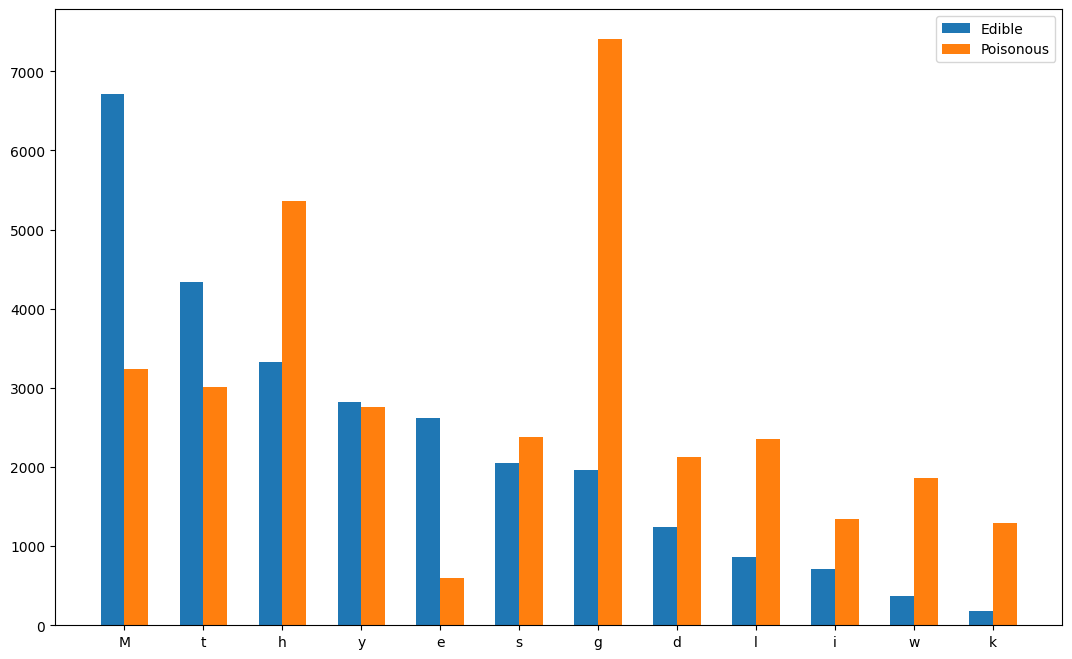

In [20]:
# Plot a bar graph for counts of each cap-surface by class.
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (13, 8))
ax.bar(x = df.loc[df['class'] == 'e', 'cap-surface'].unique(), 
       height = df.loc[df['class'] == 'e', 'cap-surface'].value_counts(),
       width = -0.3, align = 'edge',
       label = 'Edible')
ax.bar(x = df.loc[df['class'] == 'p', 'cap-surface'].unique(),
       height = df.loc[df['class'] == 'p', 'cap-surface'].value_counts(),
       width = 0.3, align = 'edge',
       label = 'Poisonous')
ax.legend();

> This bar graph suggests that mushrooms with a grooved cap-surfaces are the most likely to be poisonous. We again see that both poisonous and edible mushrooms are represented in each cap-surface.

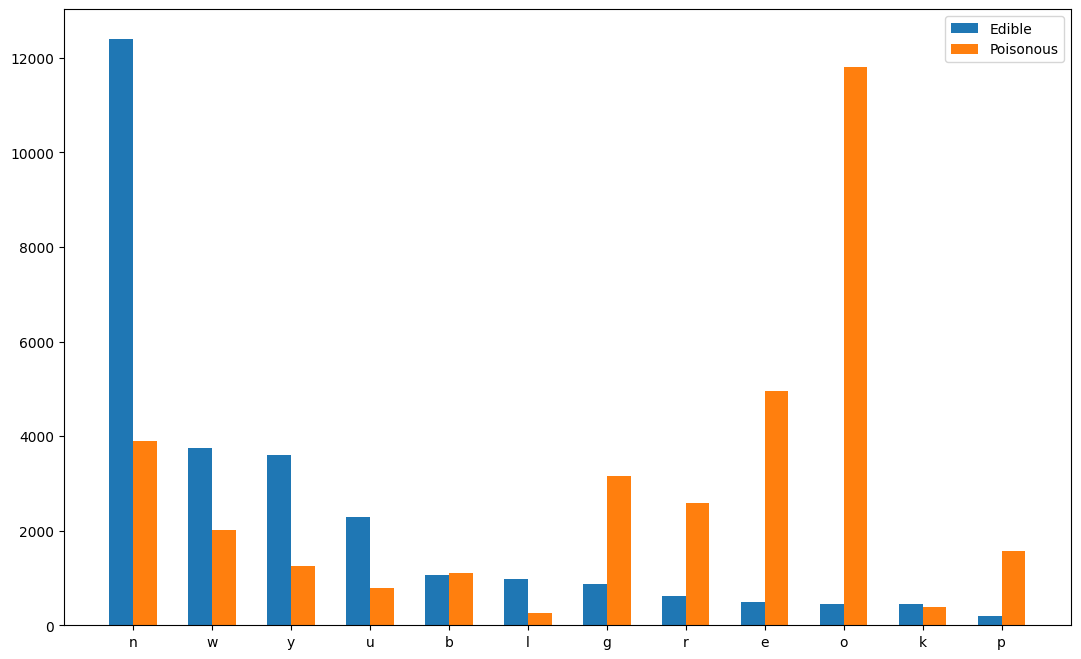

In [21]:
# Plot a bar graph for counts of each cap-color by class.
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (13, 8))
ax.bar(x = df.loc[df['class'] == 'e', 'cap-color'].unique(), 
       height = df.loc[df['class'] == 'e', 'cap-color'].value_counts(),
       width = -0.3, align = 'edge',
       label = 'Edible')
ax.bar(x = df.loc[df['class'] == 'p', 'cap-color'].unique(),
       height = df.loc[df['class'] == 'p', 'cap-color'].value_counts(),
       width = 0.3, align = 'edge',
       label = 'Poisonous')
ax.legend();

> This graph suggests that gray, green, red, and orange mushrooms tend to be the most poisonous. Orange mushrooms in particular seem to be largely poisonous.